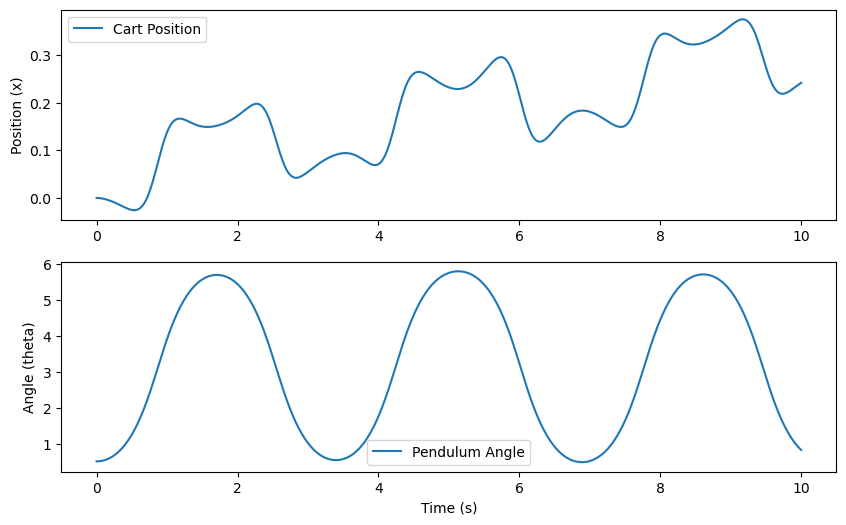

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# System parameters
M = 1.0      # Mass of the cart
m = 0.1      # Mass of the pendulum
g = 9.81     # Acceleration due to gravity
ell = 1.0    # Length of the pendulum

def equations_of_motion(t, y):
    x, theta, x_dot, theta_dot = y
    
    # Equations of motion
    x_double_dot = (m * ell * theta_dot ** 2 * np.sin(theta) - m * g * np.sin(theta) * np.cos(theta) + F(t)) / (M + m)
    theta_double_dot = (M + m) * g * np.sin(theta) / (ell * (M + m)) - x_double_dot * np.cos(theta) / ell
    
    return [x_dot, theta_dot, x_double_dot, theta_double_dot]

def F(t):
    # Example: Time-dependent force
    return 0.2 * np.sin(2 * np.pi * t)

# Initial conditions
initial_conditions = [0.0, np.pi / 6, 0.0, 0.0]  # [x, theta, x_dot, theta_dot]

# Time span for simulation
t_span = (0.0, 10.0)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the ODEs
solution = solve_ivp(equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the results
x_results = solution.y[0]
theta_results = solution.y[1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(solution.t, x_results, label='Cart Position')
plt.ylabel('Position (x)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(solution.t, theta_results, label='Pendulum Angle')
plt.ylabel('Angle (theta)')
plt.xlabel('Time (s)')
plt.legend()

plt.show()


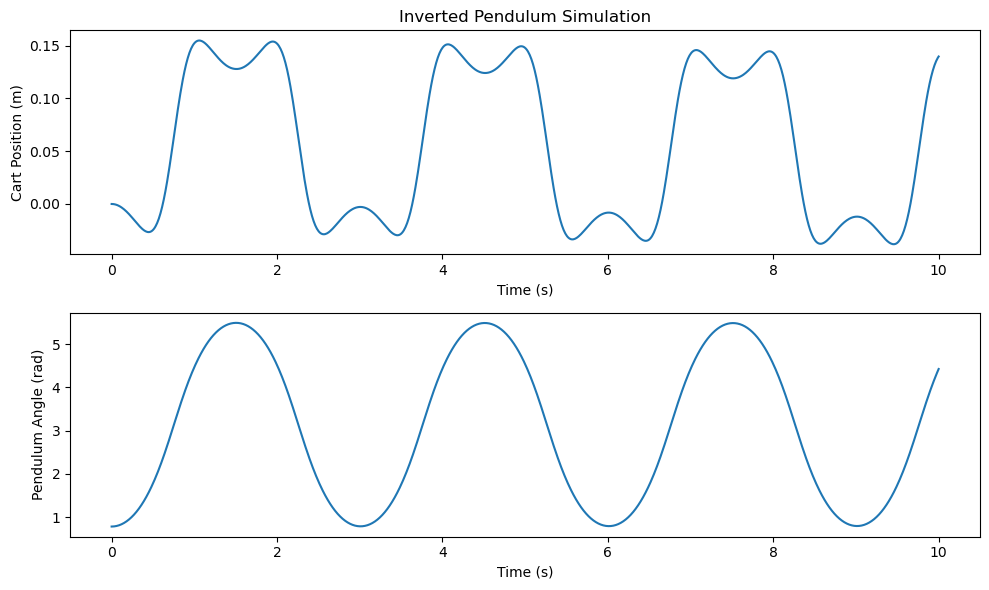

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
M = 1.0     # Mass of the cart
m = 0.1     # Mass of the pendulum
g = 9.81    # Acceleration due to gravity
l = 1.0     # Length of the pendulum

# System of ODEs
def inverted_pendulum(t, z):
    x, theta, x_dot, theta_dot = z
    
    x_double_dot = (m*l*np.sin(theta)*theta_dot**2 - m*g*np.sin(theta)*np.cos(theta) + F(t)) / (M + m*(1 - np.cos(theta)**2))
    theta_double_dot = ((M+m)*g*np.sin(theta) - m*l*np.sin(theta)*np.cos(theta)*theta_dot**2 + F(t)*np.cos(theta)) / (l*(M + m*(1 - np.cos(theta)**2)))
    
    return [x_dot, theta_dot, x_double_dot, theta_double_dot]

# External force function (you can define your own)
def F(t):
    return 0.0

# Initial conditions
z0 = [0.0, np.pi / 4, 0.0, 0.0]  # Initial positions and velocities

# Time span for simulation
t_span = (0.0, 10.0)  # Start and end time

# Solve the ODEs
solution = solve_ivp(inverted_pendulum, t_span, z0, t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Extract results
t = solution.t
x = solution.y[0]
theta = solution.y[1]

# Visualization
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Cart Position (m)')
plt.title('Inverted Pendulum Simulation')

plt.subplot(2, 1, 2)
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Pendulum Angle (rad)')

plt.tight_layout()
plt.show()


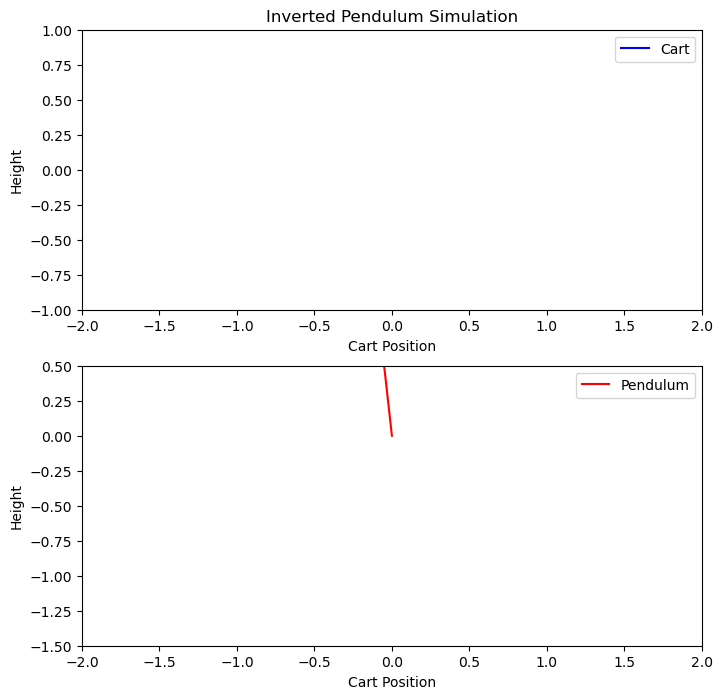

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
M = 1.0      # Mass of the cart
m = 0.1      # Mass of the pendulum
l = 1.0      # Length of the pendulum
g = 9.81     # Acceleration due to gravity

def inverted_pendulum(t, z, F_func):
    x, theta, x_dot, theta_dot = z
    
    # Equations of motion
    x_ddot = (m * l * theta_dot**2 * np.sin(theta) - F_func(t) + m * g * np.sin(theta) * np.cos(theta)) / (M + m)
    theta_ddot = ((M + m) * g * np.sin(theta) - F_func(t) * np.cos(theta) - m * l * theta_dot**2 * np.sin(theta) * np.cos(theta)) / (l * (M + m))
    
    return [x_dot, theta_dot, x_ddot, theta_ddot]

def simulate(F_func, t_span, initial_conditions):
    sol = solve_ivp(lambda t, z: inverted_pendulum(t, z, F_func), t_span, initial_conditions, t_eval=np.linspace(t_span[0], t_span[1], 1000))
    return sol.t, sol.y

# Time span and initial conditions
t_span = [0, 10]
initial_conditions = [0, np.pi + 0.1, 0, 0]  # [x, theta, x_dot, theta_dot]

# Define a time-dependent force function (example: sinusoidal force)
def force_function(t):
    return np.sin(t)

# Simulate the system
t, sol = simulate(force_function, t_span, initial_conditions)
x_vals, theta_vals, _, _ = sol

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
line1, = ax1.plot([], [], 'b', label='Cart')
line2, = ax2.plot([], [], 'r', label='Pendulum')
lines = [line1, line2]

def animate(i):
    cart_x = x_vals[i]
    pendulum_x = cart_x + l * np.sin(theta_vals[i])
    cart_y = 0
    pendulum_y = -l * np.cos(theta_vals[i])
    
    lines[0].set_data([cart_x, cart_x], [cart_y, 0])
    lines[1].set_data([cart_x, pendulum_x], [0, pendulum_y])
    
    return lines

ax1.set_xlim(-2, 2)
ax1.set_ylim(-1, 1)
ax1.set_xlabel('Cart Position')
ax1.set_ylabel('Height')
ax1.set_title('Inverted Pendulum Simulation')
ax1.legend()

ax2.set_xlim(-2, 2)
ax2.set_ylim(-1.5, 0.5)
ax2.set_xlabel('Cart Position')
ax2.set_ylabel('Height')
ax2.legend()

ani = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)
plt.show()


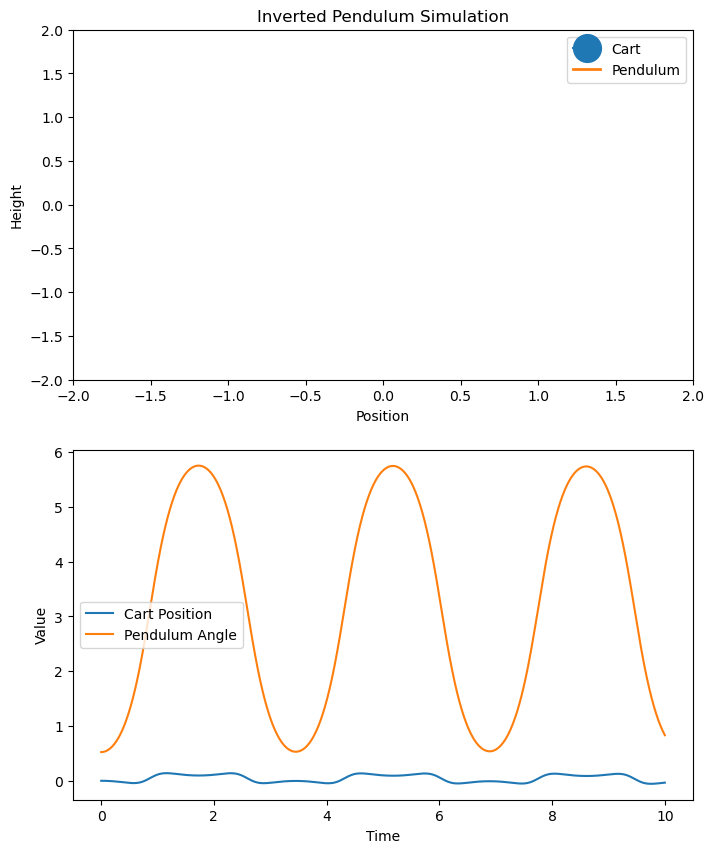

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
M = 1.0  # Mass of the cart
m = 0.1  # Mass of the pendulum
g = 9.81  # Gravity
l = 1.0  # Length of the pendulum

def equations_of_motion(t, z, F):
    x, x_dot, theta, theta_dot = z
    
    x_double_dot = (m * l * theta_dot**2 * np.sin(theta) - m * g * np.sin(theta) * np.cos(theta) + F) / (M + m)
    theta_double_dot = ((M + m) * (g * np.sin(theta) - x_double_dot * np.cos(theta))) / (l * (M + m))
    
    return [x_dot, x_double_dot, theta_dot, theta_double_dot]

def simulate(F_func, t_span, initial_conditions):
    solution = solve_ivp(
        fun=lambda t, z: equations_of_motion(t, z, F_func(t)),
        t_span=t_span,
        y0=initial_conditions,
        method='RK45',
        t_eval=np.linspace(t_span[0], t_span[1], num=1000)
    )
    return solution.t, solution.y

# Time span
t_span = (0, 10)

# Initial conditions [x, x_dot, theta, theta_dot]
initial_conditions = [0.0, 0.0, np.pi / 6, 0.0]

# Define a constant force function (you can replace this with any time-dependent function)
def constant_force(t):
    return 0.0

# Simulate the system
t, sol = simulate(constant_force, t_span, initial_conditions)

# Extract solutions
x_values = sol[0]
theta_values = sol[2]

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Cart animation
cart, = ax1.plot([], [], marker='o', markersize=20, label='Cart')
pendulum, = ax1.plot([], [], linewidth=2, label='Pendulum')
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xlabel('Position')
ax1.set_ylabel('Height')
ax1.set_title('Inverted Pendulum Simulation')
ax1.legend()

# Time series plot
ax2.plot(t, x_values, label='Cart Position')
ax2.plot(t, theta_values, label='Pendulum Angle')
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.legend()

def update_animation(i):
    cart.set_data([x_values[i]], [0])
    pendulum.set_data([x_values[i], x_values[i] + l * np.sin(theta_values[i])],
                      [0, -l * np.cos(theta_values[i])])

ani = FuncAnimation(fig, update_animation, frames=len(t), interval=50, repeat=False)
plt.show()
